# Wind

** Created by Julia Kukulies: julia.kukulies@gu.se**

In this jupyter notebook, we will look at wind measurements from Gothenburg and try to make sense out of it! 


In [1]:
import numpy as np 
import pandas as pd 
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib

file= 'Meteo_data_Goteborg_2010.csv'

data = pd.read_csv(file)
# hourly wind speed measured at Femman 
ws = data.Femman_wind_speed.values
# hourly wind directions measure at Femman 
wd= data.Femman_wind_dir.values

AttributeError: module 'matplotlib.docstring' has no attribute 'Appender'

## Wind rose 

**Where does the wind predominantly come FROM?** **Is the wind direction in line with the predominant large-scale wind circulation**? 

In [21]:
cmap = matplotlib.cm.get_cmap('viridis_r')

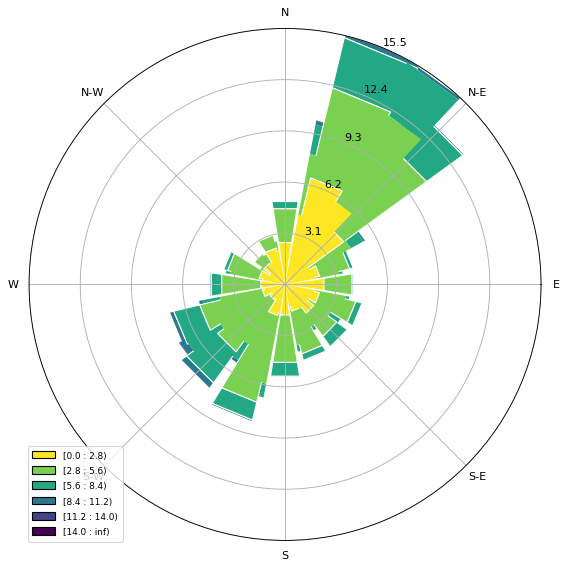

In [22]:
# stacked histogram with percentages 
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white', cmap = cmap)
ax.set_legend()

# calculate frequencies of wind speeds 
ax.bar(wd, ws, normed=True, nsector=20, cmap= cmap)
table = ax._info['table']
wd_freq = np.sum(table, axis=0)

plt.show()

## Temperature and wind 

This scatter plot shows how wind direction and temperature are related to each other. Obviously, you cannot really get much information from this plot. The colors indicate the distance from the north with darker colors being close to the north. Think about that you would like to find out whether with higher temperatures, it would be more likely get wind from one particular direction. How can you solve this problem? 


** Looking at this plot, what would the problem with a linear regression between a variable (e.g. temperature) and wind directions?**

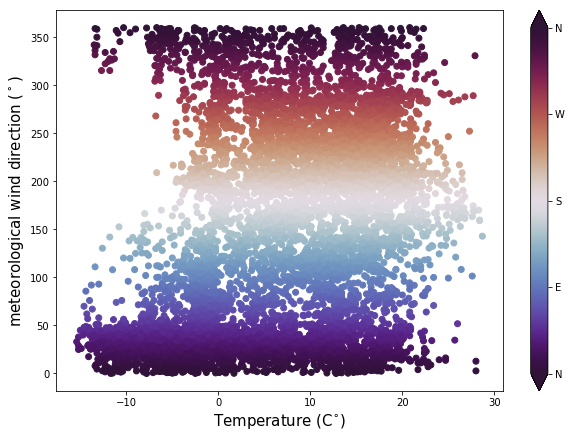

In [23]:
# hourly temperature values 
temp = data.Temp.values

# scatter plot wind direction vs. temperature 
plt.figure(figsize=(10,7))
plt.scatter(temp, wd, c= wd, cmap='twilight_shifted')
cbar = plt.colorbar(extend = 'both')
cbar.set_ticks([0, 90, 180, 270, 360])
cbar.set_ticklabels(['N', 'E', 'S', 'W', 'N'])
plt.xlabel('Temperature (C$^{\circ}$)', fontsize= 15)
plt.ylabel('meteorological wind direction ($^\circ$)', fontsize= 15)
plt.show()

## Your turn: calculate u and v components 

Use the input arrays *ws* and *wd* and transform than into *u_wind* and *v_wind*

In [24]:
# you can use np.sin(), np.cos() and np.pi for sinus and cosinus functions as well as pi


# u_wind = 
# v_wind = 

## Temperature and u and v components 

** Where does the wind predominantly come from when it is cold?**

Replace *u_wind* and *v_wind* with the u and v components you calculated and check whether the graph looks the same! 

When interpreting this figure, remember that positive v values mean **towards the north** and positive u values mean **towards east**. 


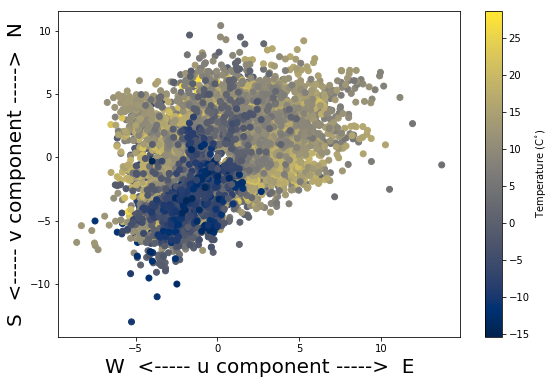

In [25]:
# I use the already calculated u and v components here 
u_wind = data.u.values
v_wind = data.v.values

# plot u and v components andtemperature 
plt.figure(figsize=(9,6))
plt.scatter(u_wind,v_wind, c=temp, cmap='cividis')
cbar=plt.colorbar(label= 'Temperature (C$^{\circ}$)')
plt.xlabel('W  <----- u component ----->  E', fontsize= 20)
plt.ylabel('S  <----- v component ----->  N', fontsize = 20)
plt.show()
